# ARSENL Backscatter Experiments Plotting

Grant Kirchhoff
Last Updated: 09-30-2022
University of Colorado Boulder

Plot post-processed data from 'fit_histogram_polynomial_complexity_iteration.ipynb'

Note: Make sure to set 'OD_str' parameter to appropriate dataset OD

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import torch
from scipy import stats
import os
import xarray as xr
import sys

# cwd = os.getcwd()
# dirLib = cwd + r'/library'
# if dirLib not in sys.path:
#     sys.path.append(dirLib)

# import fit_polynomial_methods as fit
# import data_organize as dorg

In [3]:
load_dir = r'C:\Users\jason\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Data\Postprocessed_Data'
files = os.listdir(load_dir)

OD_vals = np.zeros(len(files))
flight_time = []
t_fine = []
fit_rate_seg = []
n_shots = []
for i in range(len(files)):
    processed_data = xr.open_dataset(load_dir + r'\{}'.format(files[i]))
    key = files[i].split('_')[1][0:4]
    OD = float(key[-2:]) / 10
    OD_vals[i] = OD
    flight_time.append((processed_data.flight_time.values))
    t_fine.append((processed_data.t_fine.values))
    fit_rate_seg.append((processed_data.fit_rate_seg.values))
    n_shots.append((processed_data.n_shots.values))

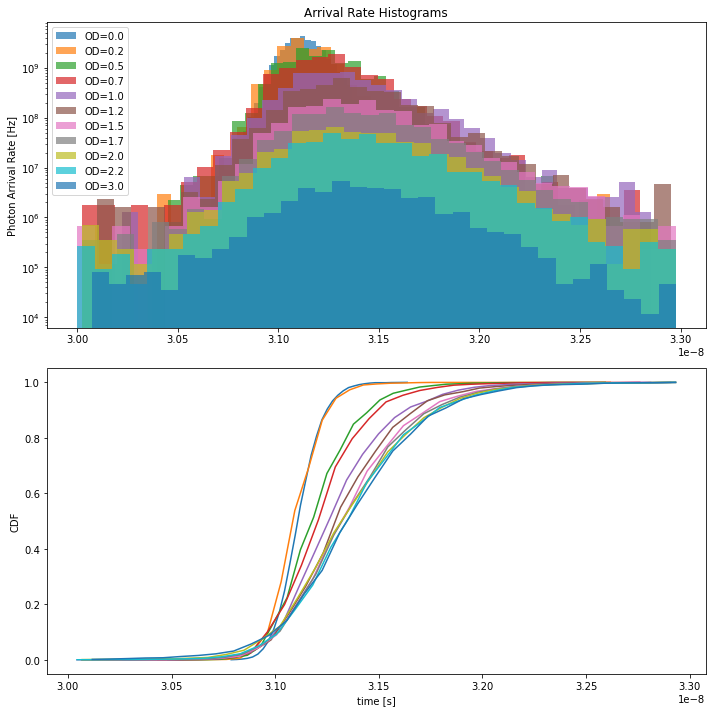

In [5]:
# Plot histograms on the same plot

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bin_num = 34
for i in range(len(flight_time)):
    n, bins = np.histogram(flight_time[i], bins=bin_num)
    binwidth = np.diff(bins)[0]
    N = n / binwidth / n_shots[i]  # [Hz] Scaling counts to arrival rate
    center = 0.5 * (bins[:-1] + bins[1:])
    ax1.bar(center, N, align='center', width=binwidth, alpha=0.7, label='OD={}'.format(OD_vals[i]))
    cumsum = np.cumsum(N)
    ax2.plot(center, cumsum/cumsum[-1])

ax1.set_title('Arrival Rate Histograms')
ax1.set_ylabel('Photon Arrival Rate [Hz]')
ax1.set_yscale('log')
ax1.legend()
ax2.set_ylabel('CDF')
ax2.set_xlabel('time [s]')
plt.tight_layout()
plt.show()


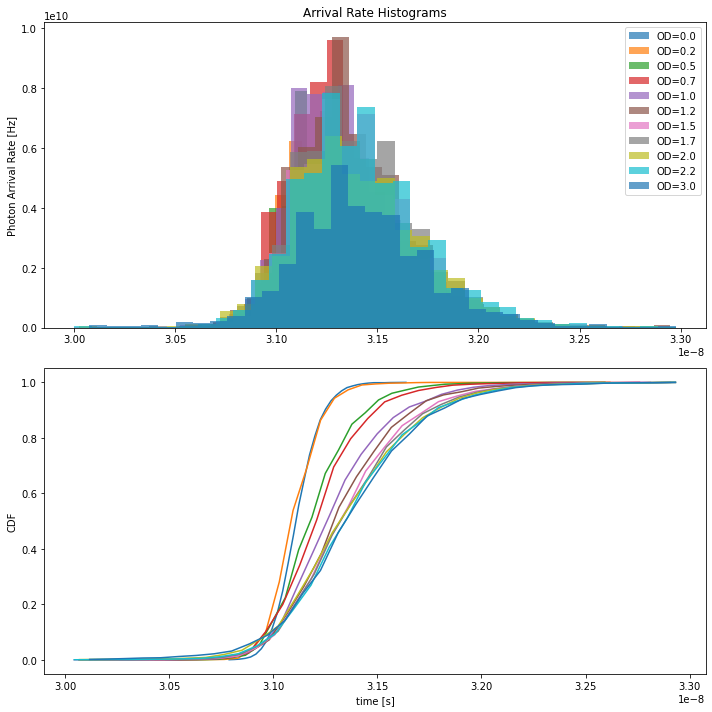

In [6]:
# Plot the "rescaled-by-OD" histograms on the same plot

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bin_num = 34
for i in range(len(flight_time)):
    n, bins = np.histogram(flight_time[i], bins=bin_num)
    binwidth = np.diff(bins)[0]
    N = n / binwidth / n_shots[i] * 10**OD_vals[i]  # [Hz] Scaling counts to arrival rate
    center = 0.5 * (bins[:-1] + bins[1:])
    ax1.bar(center, N, align='center', width=binwidth, alpha=0.7, label='OD={}'.format(OD_vals[i]))
    cumsum = np.cumsum(N)
    ax2.plot(center, cumsum/cumsum[-1])

ax1.set_title('Arrival Rate Histograms')
ax1.set_ylabel('Photon Arrival Rate [Hz]')
# ax1.set_yscale('log')
ax1.legend()
ax2.set_ylabel('CDF')
ax2.set_xlabel('time [s]')
plt.tight_layout()
plt.show()


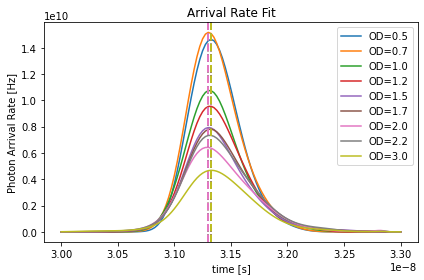

In [82]:
# Amplitude rescaling based on OD: (1/10)**OD
# OD1.0: 0.1 transmission; OD0.5: 0.32 transmission; OD0.2: 0.63 transmission

fig = plt.figure()
ax = fig.add_subplot(111)

OD_rescale = True
# Arrival rate fit
for i in range(len(flight_time)-2):
    i+=2
    if OD_rescale:
        fit_rate_seg_i = fit_rate_seg[i] * (10**OD_vals[i])  # [Hz] Scaling counts to "remove" OD effect
    else:
        fit_rate_seg_i = fit_rate_seg[i] * 1
    p = ax.plot(t_fine[i], fit_rate_seg_i, '-', label='OD={}'.format(OD_vals[i]))
    dt = t_fine[i][1] - t_fine[i][0]
    mean_val = np.sum(fit_rate_seg_i)*dt/(t_fine[i][-1]-t_fine[i][0])
    ax.axvline(t_fine[i][np.argmin(mean_val - fit_rate_seg_i)], color=p[0].get_color(), linestyle='dashed', linewidth=2)
# ax.set_xlim(3.1275e-8, 3.1375e-8)
ax.set_title('Arrival Rate Fit')
ax.set_xlabel('time [s]')
ax.set_ylabel('Photon Arrival Rate [Hz]')
ax.legend()
# ax.set_yscale('log')
plt.tight_layout()
plt.show()